# Chapter 10 - Regression Analysis

This notebook contains code accompanying Chapter 10 Regression Analysis in *Practical Discrete Mathematics* by Ryan T. White and Archana Tikayat Ray.

## Auto Dataset

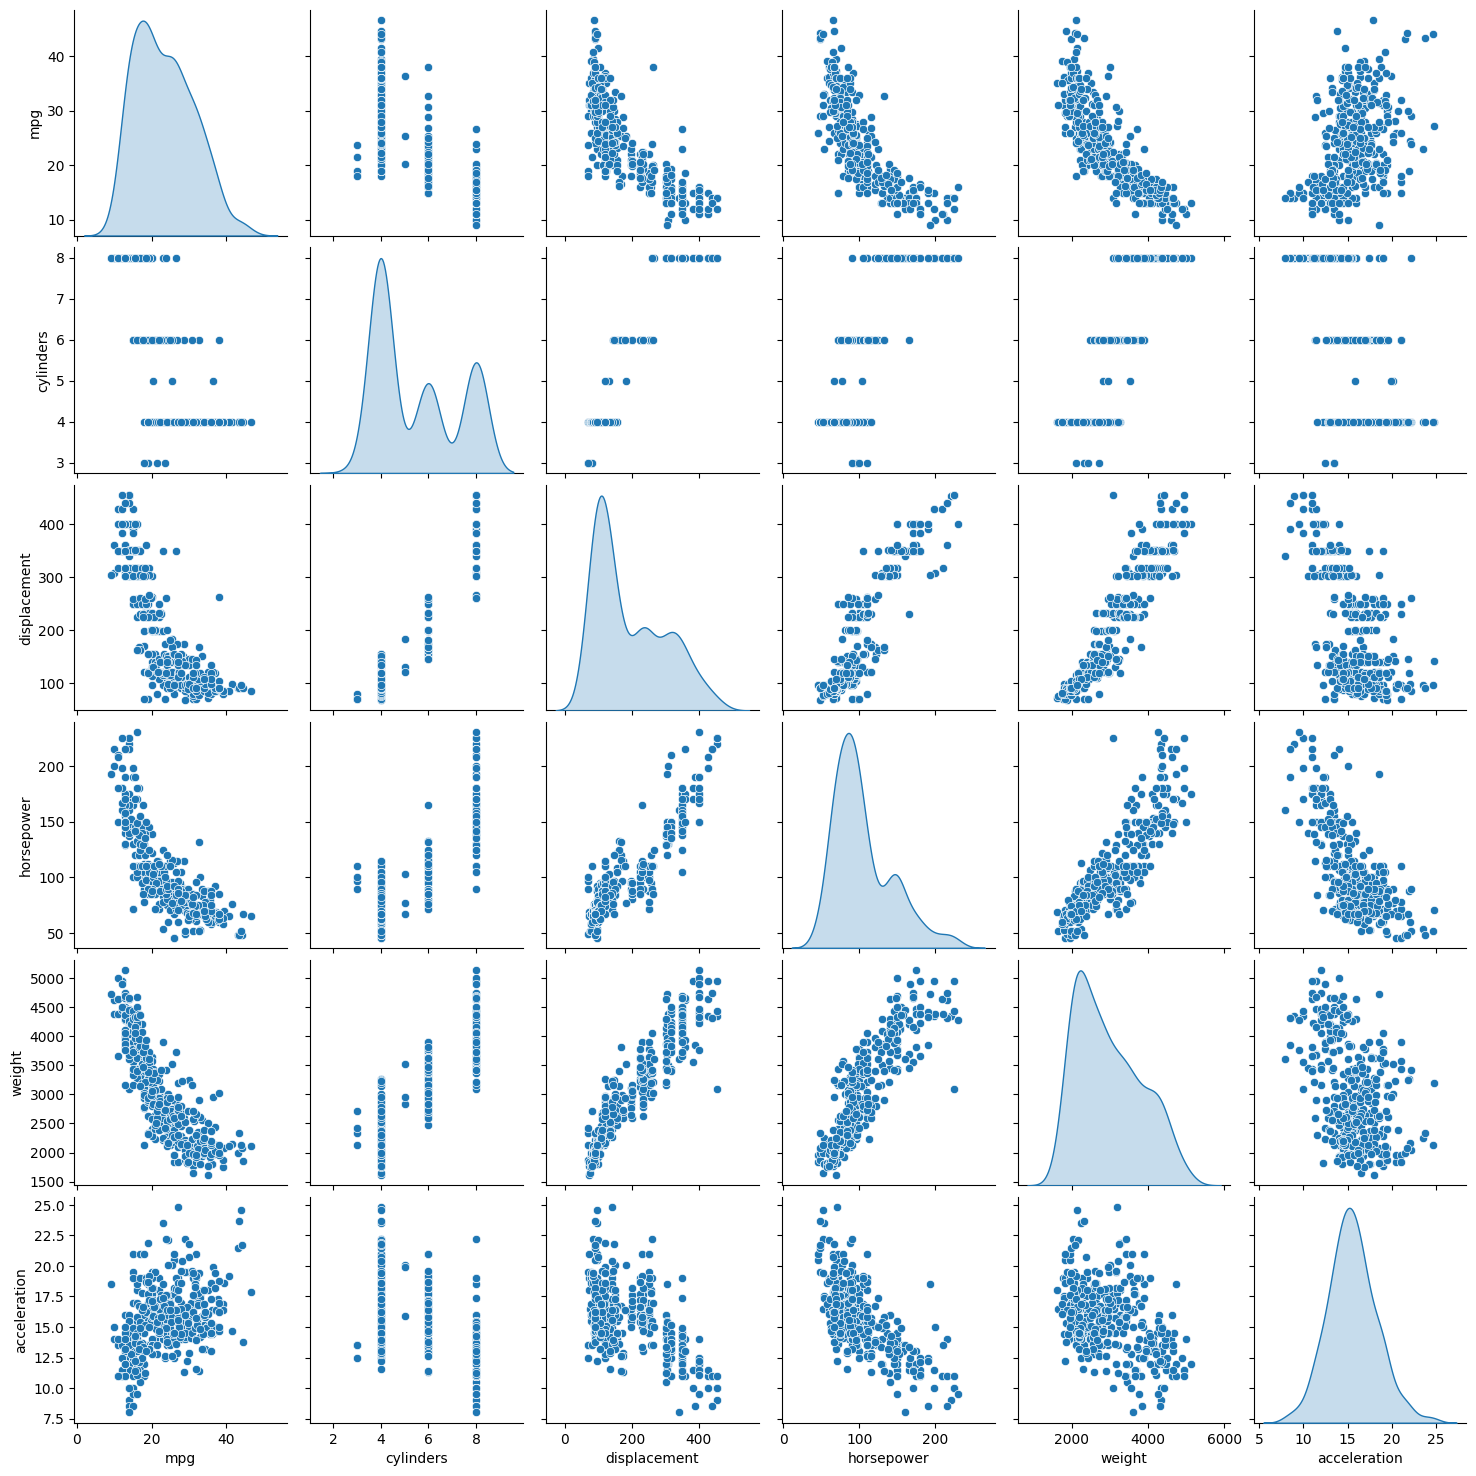

In [15]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#Importing the csv file
df = pd.read_csv("auto_dataset.csv",index_col=0)

#Plotting the pairplot
sns.pairplot(df, diag_kind="kde")
plt.show()

## Least-squares lines with `NumPy`

In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# find the shape of the auto dataset
df = pd.read_csv("auto_dataset.csv")
df.shape

(392, 7)

In [17]:
X = df["weight"]
Y = df["horsepower"]

X_b = np.c_[np.ones((392,1)),X] #here we are adding X_o = 1 to all the feature values
beta_values = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(Y)

print(beta_values)

[-12.1834847    0.03917702]


In [18]:
X_new = np.array([[2500],[2045]])
X_new_b = np.c_[np.ones((2,1)),X_new]
y_predict = X_new_b.dot(beta_values)

print(f"Weight of car = 2500; predicted horsepower is {y_predict[0]:.3}; actual horsepower is 88")
print(f"Weight of car = 2045; predicted horsepower is {y_predict[1]:.3}; actual horsepower is 68")

Weight of car = 2500; predicted horsepower is 85.8; actual horsepower is 88
Weight of car = 2045; predicted horsepower is 67.9; actual horsepower is 68


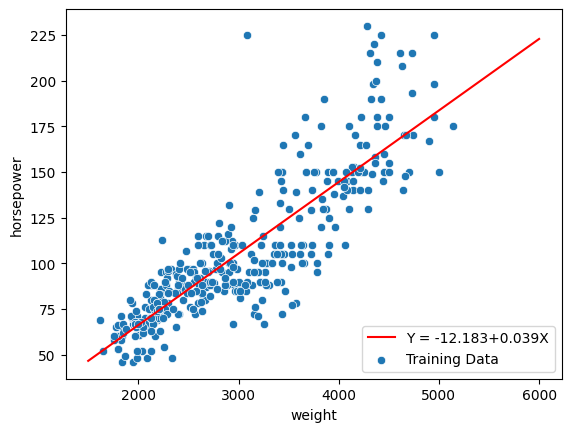

In [20]:
X_plot= np.array([[1500],[6000]])
X_plot_b = np.c_[np.ones((2,1)),X_plot]
Y_plot = X_plot_b.dot(beta_values)

Equationline = "Y = {:.3f}+{:.3f}X".format(beta_values[0], beta_values[1])

plt.plot(X_plot, Y_plot, "r-", label = Equationline)
sns.scatterplot(x=X,y=Y, label = "Training Data")
plt.legend()
plt.show()

Next, we show how to find the model with scikit-learn.

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()
df = pd.read_csv("auto_dataset.csv")

X = df["weight"]
Y = df["horsepower"]

X = X.values.reshape(-1,1)
Y = Y.values.reshape(-1,1)

reg.fit(X, Y)

print("The value obtained for beta_o is:", reg.intercept_)
print("The value obtained for beta_1 is:", reg.coef_[0])

The value obtained for beta_o is: [-12.1834847]
The value obtained for beta_1 is: [0.03917702]


In [22]:
# predict the output from a new datapoint
X_new = np.array([[2500],[2045]])
print(reg.predict(X_new))

[[85.75906307]
 [67.93351937]]


## Least-squares curves with `NumPy` and `SciPy`

In [23]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

#Importing the dataset as a pandas dataframe
df = pd.read_csv("auto_dataset.csv")

#Selecting the variables of interest
X = df["horsepower"]
y = df["mpg"]

#Converting the series to a column matrix
X_new = X.values.reshape(-1,1)
y_new = y.values.reshape(-1,1)

#Fitting y = beta0 + beta1x + beta2x^2
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X_new)

reg = LinearRegression()
reg.fit(X_poly, y_new)

print("Y = {:.4f} X^2 {:.3f} X + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0]))

Y = 0.0012 X^2 -0.466 X + 56.900


Let's plot the model.

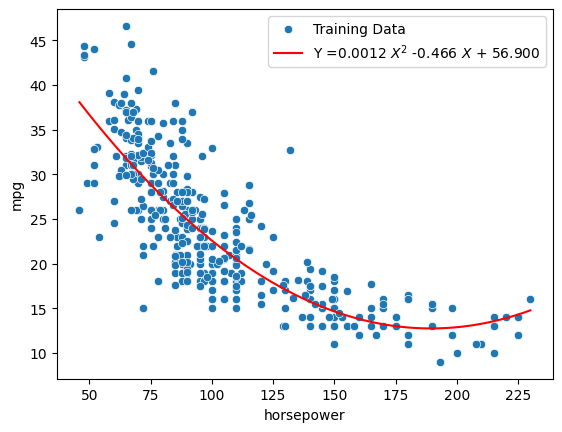

In [25]:
start = df["horsepower"].values.min()
stop = df["horsepower"].values.max()

X_plot = np.linspace(start, stop, 1000)
Y_plot = reg.coef_[0,1] * X_plot * X_plot + reg.coef_[0,0] * X_plot + reg.intercept_[0]

Equationline = "Y ={:.4f} $X^2$ {:.3f} $X$ + {:.3f}".format(reg.coef_[0,1], reg.coef_[0,0], reg.intercept_[0])

sns.scatterplot(x=X,y=y, label = "Training Data")
plt.plot(X_plot, Y_plot, "r-", label = Equationline)
plt.legend()
plt.show()

### Least-squares surfaces with `NumPy` and `SciPy`

In [26]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
from mpl_toolkits import mplot3d
import matplotlib.pyplot as plt

#Importing the csv file and choosing the X and Y variables
df = pd.read_csv("auto_dataset.csv")

Y = df["displacement"]
X = df[["horsepower","weight"]]

#Fitting the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Printing the parameter values obtained after fitting the model
print("The value obtained for beta_o is: ", reg.intercept_)
print("The value obtained for beta_1 and beta_2 are: ",reg.coef_[0] , "and", reg.coef_[1] )

The value obtained for beta_o is:  -135.95073526530456
The value obtained for beta_1 and beta_2 are:  0.9757143655155813 and 0.07671670340152593


Let's plot the model.

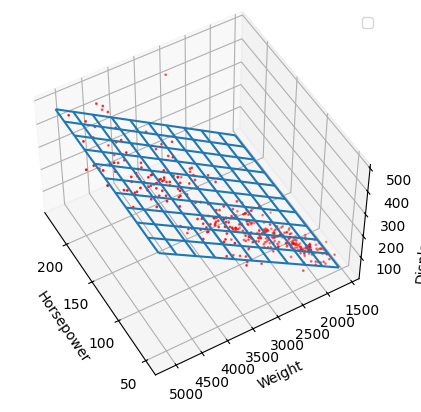

In [27]:
# Plotting the surface plot
X1_min = df["horsepower"].values.min()
X1_max = df["horsepower"].values.max()
X1_values = np.linspace(X1_min, X1_max, 100)

X2_min = df["weight"].values.min()
X2_max = df["weight"].values.max()
X2_values = np.linspace(X2_min, X2_max, 100)

Y_reg = reg.intercept_ + (reg.coef_[0] * X1_values) + (reg.coef_[1] * X2_values)
Y_plot = Y_reg.reshape(-1,1)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X.horsepower, X.weight, Y, color="red", s=1)

X1_plot, X2_plot = np.meshgrid(X1_values, X2_values)
surf = ax.plot_wireframe(X1_plot, X2_plot, Y_plot, rstride=10, cstride=10)

ax.view_init(50, 150)
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')
plt.legend()
plt.show()

Q1 Assume the 3D plot is calculated as above, Please predict the following displacement based on the gioven horsepower and weight.

1) horsepower = 87 and weight is 2589, what is the displacement value?

2) horsepower = 175 and weight = 4800, what is the displacement?


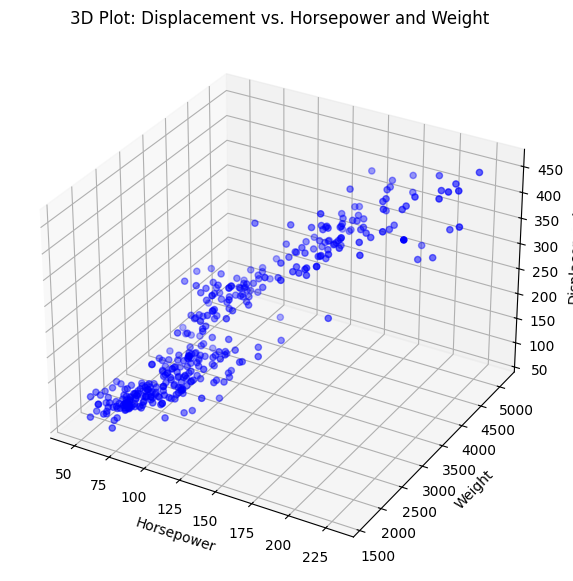

In [31]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# Assuming 'df' is your DataFrame containing the data:
ax.scatter(df['horsepower'], df['weight'], df['displacement'], c='blue', marker='o')
# Changed data['87'] to df['horsepower']
# Changed data['2589'] to df['weight']
# Changed data['Displacement'] to df['displacement']



# Set labels
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')

# Title
ax.set_title('3D Plot: Displacement vs. Horsepower and Weight')

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


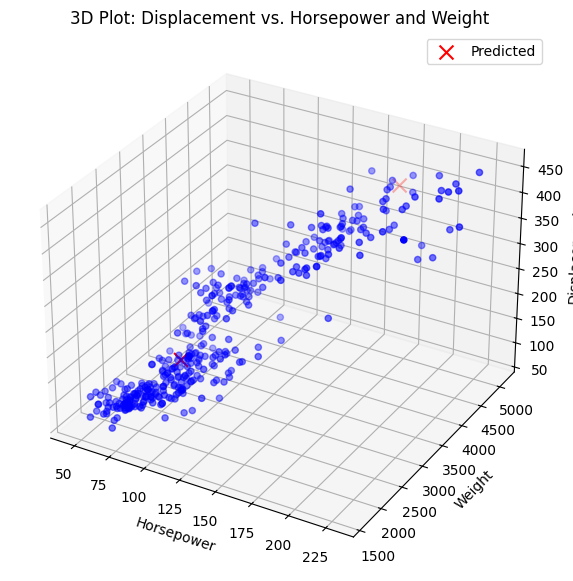

In [34]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression # Importing LinearRegression

# Assuming you have already trained your model and it's stored in 'reg'
# reg = LinearRegression()
# reg.fit(X, Y) # Where X and Y are your training data

def predict_displacement(horsepower, weight):
    """Predicts displacement based on horsepower and weight using the trained model."""
    # Create input data for prediction
    input_data = [[horsepower, weight]]

    # Make the prediction using the trained model 'reg'
    displacement = reg.predict(input_data)[0]

    return displacement


# Create a 3D plot
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot
# Assuming 'df' is your DataFrame containing the data:
ax.scatter(df['horsepower'], df['weight'], df['displacement'], c='blue', marker='o')


# Set labels
ax.set_xlabel('Horsepower')
ax.set_ylabel('Weight')
ax.set_zlabel('Displacement')

# Title
ax.set_title('3D Plot: Displacement vs. Horsepower and Weight')


# Predicted displacements
displacement_1 = predict_displacement(87, 2589)
displacement_2 = predict_displacement(175, 4800)

# Add predicted points to the plot
ax.scatter([87, 175], [2589, 4800], [displacement_1, displacement_2], c='red', marker='x', s=100, label='Predicted')

# Add legend
ax.legend()

# Show plot
plt.show()

Q2 please predict the horse power based on the value of weight, acceleration and mpg. Thereare 3 X values and 1 Y value. Please train the model

In [40]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

# Load your dataset
df = pd.read_csv("auto_dataset.csv")  # Replace with the actual path to your dataset

# Select the independent variables and dependent variable
X = df[["weight", "acceleration", "mpg"]]
Y = df["horsepower"]

# Fit the linear regression model
reg = LinearRegression()
reg.fit(X, Y)

# Create a meshgrid for weight and acceleration (fixed mpg value of 25)
weight_range = np.linspace(X["weight"].min(), X["weight"].max(), 30)
acc_range = np.linspace(X["acceleration"].min(), X["acceleration"].max(), 30)
weight_grid, acc_grid = np.meshgrid(weight_range, acc_range)

# Assume mpg = 25 (fixed value for simplicity)
mpg_value = 25  # You can change this value to explore different scenarios

# Predict horsepower values using the regression model
horsepower_grid = reg.intercept_ + reg.coef_[0] * weight_grid + reg.coef_[1] * acc_grid + reg.coef_[2] * mpg_value

# Create a 3D surface plot using Plotly
fig = go.Figure(data=[go.Surface(
    z=horsepower_grid, x=weight_grid, y=acc_grid,
    colorscale='Viridis', opacity=0.8)])

# Add the actual data points to the plot (as red markers)
fig.add_trace(go.Scatter3d(
    x=X["weight"], y=X["acceleration"], z=Y,
    mode='markers', marker=dict(size=5, color='red')))

# Update plot layout for titles and axes labels
fig.update_layout(
    title="Interactive 3D Linear Regression Model",
    scene=dict(
        xaxis_title='Weight',
        yaxis_title='Acceleration',
        zaxis_title='Horsepower'
    ),
    margin=dict(l=0, r=0, b=0, t=40)
)

# Show the interactive plot
fig.show()

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Load dataset (replace with your dataset)
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data"
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']
data = pd.read_csv(url, delim_whitespace=True, names=column_names, na_values='?')

# Drop rows with missing values
data.dropna(inplace=True)

<ipython-input-41-b7035d5d8010>:8: FutureWarning:

The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead



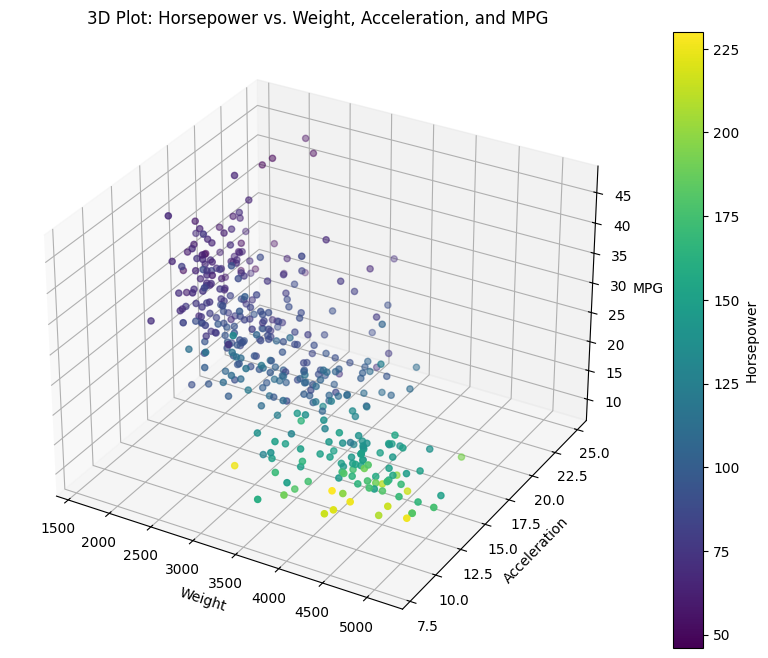

In [42]:
# Create a 3D plot
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot: Horsepower vs. Weight, Acceleration, and MPG
scatter = ax.scatter(data['Weight'], data['Acceleration'], data['MPG'], c=data['Horsepower'], cmap='viridis', marker='o')

# Set labels
ax.set_xlabel('Weight')
ax.set_ylabel('Acceleration')
ax.set_zlabel('MPG')

# Add a color bar to represent horsepower
cbar = plt.colorbar(scatter)
cbar.set_label('Horsepower')

# Title
ax.set_title('3D Plot: Horsepower vs. Weight, Acceleration, and MPG')

# Show plot
plt.show()

In [43]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Features (X) and Target (Y)
X = data[['Weight', 'Acceleration', 'MPG']]
y = data['Horsepower']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Predict horsepower for given weight, acceleration, and MPG
def predict_horsepower(weight, acceleration, mpg):
    return model.predict([[weight, acceleration, mpg]])

# Example: Weight = 3000, Acceleration = 15, MPG = 20
predicted_horsepower = predict_horsepower(3000, 15, 20)

# Add predicted point to the 3D plot
ax.scatter(3000, 15, 20, c='red', marker='x', s=100, label='Predicted')

# Add legend
ax.legend()

# Show plot
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:2739: UserWarning:

X does not have valid feature names, but LinearRegression was fitted with feature names

